示例为利用pytorch进行MNIST字体的AutoEncoder的无监督式学习

In [27]:
import os
import torch
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [28]:
# torch.manual_seed(1)

# 超参数
EPOCH = 5
BATCH_SIZE = 64
LR = 0.005   # 学习率
DOWNLOAD_MNIST = False
N_TEST_IMG = 5    # 用于可视化
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")   # 选择CPU或GPU

In [29]:
import torchvision
# 训练集
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, 
                 transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST)

torch.Size([60000, 28, 28])
torch.Size([60000])


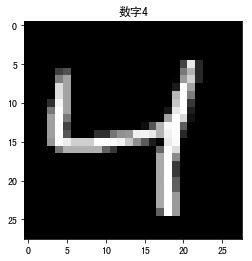

In [30]:
# plot
print(train_data.data.size())
print(train_data.targets.size())
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title("数字{}".format(train_data.targets[2].numpy()))
plt.show()

In [31]:
# dataloader
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
train_x_batch, train_y_batch=next(iter(train_loader))
print(train_x_batch.shape)
print(train_y_batch.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [32]:
# 构造网络
class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.Tanh(),
            torch.nn.Linear(128, 64),
            torch.nn.Tanh(),
            torch.nn.Linear(64, 12),
            torch.nn.Tanh(),
            torch.nn.Linear(12, 3)
        )  # 编码器
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3, 12),
            torch.nn.Tanh(),
            torch.nn.Linear(12, 64),
            torch.nn.Tanh(),
            torch.nn.Linear(64, 128),
            torch.nn.Tanh(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )  # 解码器

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

autoencoder = AutoEncoder().to(DEVICE)
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [33]:
# 定义损失函数和优化器
criteria = torch.nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)

Epoch:  0 | train loss: 0.2325


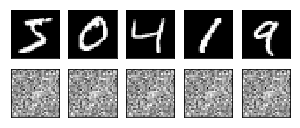

Epoch:  0 | train loss: 0.0692


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0643


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0534


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0500


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0533


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0497


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0475


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0447


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0466


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0473


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0409


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0466


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0447


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0392


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0403


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0414


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0414


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0424


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0409


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0391


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0382


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0392


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0383


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0338


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0365


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0376


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0380


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0412


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0380


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0400


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0336


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0392


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0395


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0363


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

In [34]:
# 初始化作图
fig, ax = plt.subplots(2, N_TEST_IMG, figsize=(5,2))
plt.ion()

# 子图1为固定的若干数字
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28 * 28).type(torch.FloatTensor) / 255.
for i in range(N_TEST_IMG):
    ax[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    ax[0][i].set_xticks(())
    ax[0][i].set_yticks(())

# 子图2为随着训练解码得到的对应数字
for epoch in range(EPOCH):
    for step, (x, y_label) in enumerate(train_loader):
        autoencoder.train()
        b_x = x.view(-1, 28 * 28)  # 将channel=1进行压缩
        b_y = x.view(-1, 28 * 28)  # 对于自编码器，输入和输出是一样的

        encoded, decoded = autoencoder(b_x)
        loss = criteria(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
            # 绘制autoencoder压缩-解压得到数据
            autoencoder.eval()
            with torch.no_grad():
                _, decoded_data = autoencoder(view_data)
                for i in range(N_TEST_IMG):
                    ax[1][i].clear()
                    ax[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                    ax[1][i].set_xticks(())
                    ax[1][i].set_yticks(())
                plt.draw()
                plt.pause(0.05)

plt.ioff()
plt.show()